In [14]:
from torch.nn.utils.rnn import pack_sequence
a = torch.tensor([1, 2, 3])
b = torch.tensor([4, 5])
c = torch.tensor([6])
pack_sequence([a, b, c])

PackedSequence(data=tensor([1, 4, 6, 2, 5, 3]), batch_sizes=tensor([3, 2, 1]), sorted_indices=None, unsorted_indices=None)

In [76]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch.optim as optim
from torch.utils.data import DataLoader

import help as hp
from importlib import reload
reload(hp)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
dtype= torch.float32

In [1]:
(a,b) =(1,2)

In [4]:
b

2

In [14]:
import torch
from torch.utils.data import Dataset, DataLoader

class MultivarTimeSeriesDataset(Dataset):
    def __init__(self, data):
        self.data = data

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return self.data[idx]

def create_batches(data, batch_size, seq_len):
    dataset = MultivarTimeSeriesDataset(data)
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=False)
    batches = []
    for batch_indices in dataloader:
        batch = []
        for idx in batch_indices:
            start = idx
            end = start + seq_len
            batch.append(data[start:end])
        batches.append(torch.stack(batch))
    return batches

# 示例用法
multivariate_time_series = [
    [10, 20, 30, 40, 50, 60],
    [11, 21, 31, 41, 51, 61],
    [12, 22, 32, 42, 52, 62],
    [13, 23, 33, 43, 53, 63],
    [14, 24, 34, 44, 54, 64],
    [15, 25, 35, 45, 55, 65],
    [16, 26, 36, 46, 56, 66],
    [17, 27, 37, 47, 57, 67],
    [18, 28, 38, 48, 58, 68],
    [19, 29, 39, 49, 59, 69],
    [20, 30, 40, 50, 60, 70],
    [21, 31, 41, 51, 61, 71],
    [22, 32, 42, 52, 62, 72],
    [23, 33, 43, 53, 63, 73],
    [24, 34, 44, 54, 64, 74],
    [25, 35, 45, 55, 65, 75],
    [26, 36, 46, 56, 66, 76],
    [27, 37, 47, 57, 67, 77],
    [28, 38, 48, 58, 68, 78],
    [29, 39, 49, 59, 69, 79]
]

batches = create_batches(multivariate_time_series, batch_size=4, seq_len=3)

for batch in batches:
    print(batch.size())
    print(batch)
    print('---')

TypeError: only integer tensors of a single element can be converted to an index

In [22]:
import torch
from torch.utils.data import TensorDataset, DataLoader

# 多元时间序列数据
multivariate_time_series = [
    [10, 20, 30, 40, 50, 60],
    [11, 21, 31, 41, 51, 61],
    [12, 22, 32, 42, 52, 62],
    [13, 23, 33, 43, 53, 63],
    [14, 24, 34, 44, 54, 64],
    [15, 25, 35, 45, 55, 65],
    [16, 26, 36, 46, 56, 66],
    [17, 27, 37, 47, 57, 67],
    [18, 28, 38, 48, 58, 68],
    [19, 29, 39, 49, 59, 69],
    [20, 30, 40, 50, 60, 70],
    [21, 31, 41, 51, 61, 71],
    [22, 32, 42, 52, 62, 72],
    [23, 33, 43, 53, 63, 73],
    [24, 34, 44, 54, 64, 74],
    [25, 35, 45, 55, 65, 75],
    [26, 36, 46, 56, 66, 76],
    [27, 37, 47, 57, 67, 77],
    [28, 38, 48, 58, 68, 78],
    [29, 39, 49, 59, 69, 79]
]

# 将数据转换为Tensor
data = torch.tensor(multivariate_time_series)

# 设置序列长度和批次大小
seq_len = 4
batch_size = 4

# 创建滑动窗口
def create_inout_sequences(input_data, seq_len):
    inout_seq = []
    L = len(input_data)
    for i in range(L-seq_len):
        train_seq = input_data[i:i+seq_len]
        inout_seq.append(train_seq)
    return torch.stack(inout_seq)

# 生成输入数据
x = create_inout_sequences(data, seq_len)

# 创建Dataset和DataLoader
dataset = TensorDataset(x)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=False)

# 遍历DataLoader获取批次数据
for batch in dataloader:
    # batch为(batch_size, seq_len, features)的张量
    print(batch.size())
    print(batch)
    # torch.Size([4, 4, 6])
    break

AttributeError: 'list' object has no attribute 'size'

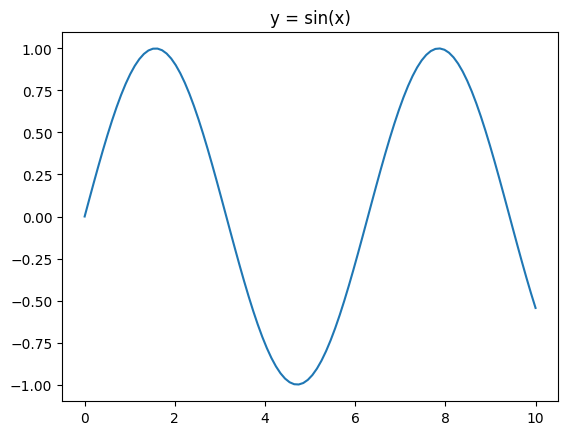

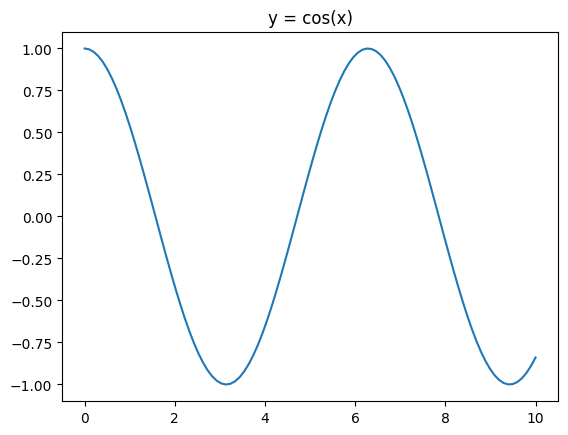

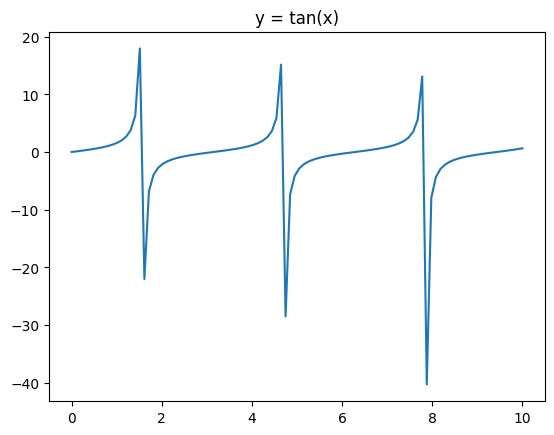

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# 假设你有三组数据
x = np.linspace(0, 10, 100)
y1 = np.sin(x)
y2 = np.cos(x)
y3 = np.tan(x)

# 创建第一个图形窗口并绘制第一个折线图
plt.figure(1)
plt.plot(x, y1)
plt.title('y = sin(x)')

# 创建第二个图形窗口并绘制第二个折线图
plt.figure(2)
plt.plot(x, y2)
plt.title('y = cos(x)')

# 创建第三个图形窗口并绘制第三个折线图
plt.figure(3)
plt.plot(x, y3)
plt.title('y = tan(x)')

# 显示所有图形
plt.show()


In [28]:
gene_index = np.empty(10)

In [29]:
gene_index

array([0., 0., 1., 0., 1., 1., 0., 1., 0., 0.])

In [35]:
a = np.arange(12).reshape((4,3))
a_empty =np.empty(12)

(a_empty != None).sum()

12

In [41]:
t2 = np.arange(12).reshape(3, 4)
print(t2)
sorted_indices =np.array([2,0,1])
t2(sorted_indices)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


TypeError: 'numpy.ndarray' object is not callable

In [31]:
for i in range(0,99,10):
    print(i)
    

0
10
20
30
40
50
60
70
80
90


In [48]:
a_empty =np.empty(12)

In [49]:
a_empty[:3]= np.array([1,2,3]) 

In [50]:
a_empty

array([1.00000000e+000, 2.00000000e+000, 3.00000000e+000, 6.91458496e-310,
       6.91475352e-310, 6.91458477e-310, 6.91458330e-310, 6.91458330e-310,
       6.91458330e-310, 6.91458330e-310, 6.91458330e-310, 6.91458330e-310])

In [51]:
empty_count = np.isnan(a_empty).sum()
empty_count

0

In [63]:
a=1*10
b=2*10
b-a

10

In [82]:
t2 = np.arange(4,dtype=float)

In [83]:
t2_ones = np.ones(4)


In [89]:
t2_ones,t2

(array([1., 1., 1., 1.]), array([0., 1., 2., 3.]))

In [ ]:
t2_

In [74]:
torch.tensor(t2).reshape((3,-1,4))

tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7]],

        [[ 8,  9, 10, 11],
         [ 0,  1,  2,  3]],

        [[ 4,  5,  6,  7],
         [ 8,  9, 10, 11]]])

In [88]:
loss = nn.MSELoss()
loss(torch.tensor(t2),torch.tensor(t2_ones))

tensor(1.5000, dtype=torch.float64)

In [90]:
x = torch.randn(3, 4, 5)
f_norm = torch.norm(x, 'fro')
print(f_norm)

tensor(8.1897)


In [91]:
3*4/5

2.4

In [92]:
(3*4)/5

2.4